Ejercicio 2.1. Resolución del problema con dualidad fuerte donde se plantea cantidades que se exportan/importan para el lider /seguidor.

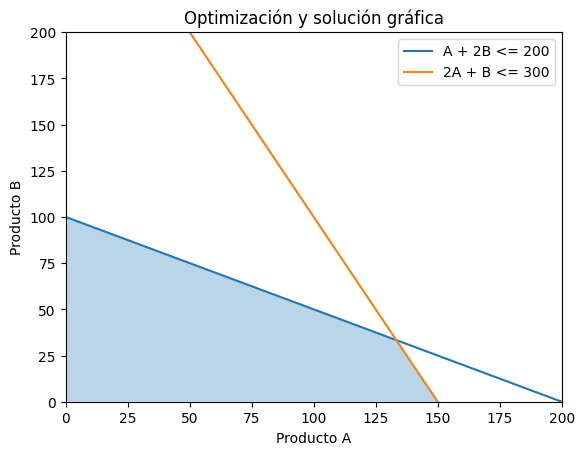

In [16]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables del líder (nivel superior)
A = cp.Variable(boolean=True)
B = cp.Variable(boolean=True)

# Definir las variables del seguidor (nivel inferior)
y1 = cp.Variable(boolean=True)
y2 = cp.Variable(boolean=True)

# Definir las funciones objetivo para el líder y el seguidor
leader_obj = cp.Maximize(100 * A + 150 * B)
follower_obj = cp.Maximize(200 * y1 + 300 * y2)

# Definir las restricciones del líder
leader_constraints = [
    A + 2 * B <= 200,
    2 * A + B <= 300,
]

# Resolver el problema del líder
leader_problem = cp.Problem(leader_obj, leader_constraints)
leader_problem.solve()

# Definir las restricciones del seguidor en función de las decisiones del líder
follower_constraints = [
    100 * y1 + 200 * y2 <= A.value,
    150 * y1 + 300 * y2 <= B.value,
]

# Resolver el problema del seguidor
follower_problem = cp.Problem(follower_obj, follower_constraints)
follower_problem.solve()

# Graficar las restricciones y soluciones óptimas
a = np.linspace(0, 200, 1000)
b1 = (200 - a) / 2
b2 = 300 - 2 * a

plt.plot(a, b1, label="A + 2B <= 200")
plt.plot(a, b2, label="2A + B <= 300")
plt.fill_between(a, np.minimum(b1, b2), 0, where=(b1 >= 0) & (b2 >= 0), alpha=0.3)



plt.xlim(0, 200)
plt.ylim(0, 200)
plt.xlabel("Producto A")
plt.ylabel("Producto B")
plt.legend()
plt.title("Optimización y solución gráfica")
plt.show()


Resolución del problema del seguidor

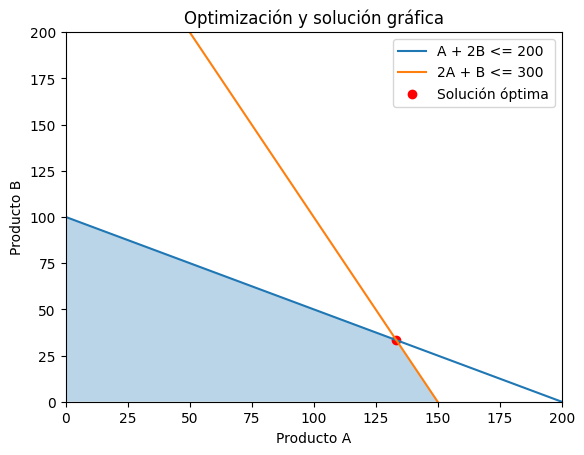

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Resolver el problema del primer nivel (con restricciones incluidas)
A = cp.Variable(pos=True)
B = cp.Variable(pos=True)
# Creamos dos variables llamadas A y B para representar la cantidad de productos A y B que queremos exportar. 
# Estas variables son siempre positivas (o cero).



Z = 100 * A + 150 * B 
# Calculamos el beneficio total (Z) multiplicando la cantidad de productos A y B por sus respectivos beneficios (100 y 150).

constraints = [
    A + 2 * B <= 200,
    2 * A + B <= 300,
]

# Establecemos las restricciones del problema. No podemos usar más de 200 unidades del recurso M y 300 unidades del recurso N.
#################################
problem1 = cp.Problem(cp.Maximize(Z), constraints)
problem1.solve()

# Creamos el primer problema de optimización, donde queremos maximizar el beneficio total de las exportaciones (Z) cumpliendo las restricciones.
# Resolvemos el primer problema de optimización para encontrar la mejor cantidad de productos A y B a exportar.

####################################

# Preparar datos para graficar
a = np.linspace(0, 200, 1000)
b1 = (200 - a) / 2
b2 = 300 - 2 * a

plt.plot(a, b1, label="A + 2B <= 200")
plt.plot(a, b2, label="2A + B <= 300")
plt.fill_between(a, np.minimum(b1, b2), 0, where=(b1 >= 0) & (b2 >= 0), alpha=0.3)

# Graficar la solución óptima
plt.scatter(A.value, B.value, color="red", label="Solución óptima")

plt.xlim(0, 200)
plt.ylim(0, 200)
plt.xlabel("Producto A")
plt.ylabel("Producto B")
plt.legend()
plt.title("Optimización y solución gráfica")
plt.show()


Ejercicio 2.2. Sin dualidad fuerte (resolución del líder para resolver del seguidor ). Se ha propuesto un modelo sencillo con solo 5 productos, 10 de limite de peso uy 5 ganancias y 5 pesos para poder utilizar la "fuerza bruta" con todas las combinaciones hechas a "mano" usando itertools- hemos intentado utilizar CVXPY y otras librerías de programación lineal pero la función es cuadrática, también hemos intentado utilizar un algoritmo genético pero ha dado error (seguramente porque hayamos planteado mal la adaptación). 

In [8]:
import numpy as np
import itertools

# Generamos datos de ejemplo
n = 5  # número de productos
W = 10  # límite de peso
d = np.array([3, 4, 5, 6, 7])  # ganancias de los productos
w = np.array([2, 3, 4, 5, 6])  # pesos de los productos

# Generamos todas las combinaciones posibles de 0s y 1s de longitud n
combinations = list(itertools.product([0, 1], repeat=n))

# Inicializamos las soluciones óptimas y los valores de las funciones objetivo
optimal_x = optimal_y = None
optimal_f1 = optimal_f2 = -np.inf

# Iteramos sobre todas las combinaciones posibles
for x in combinations:
    x = np.array(x)
    # Verificamos la restricción de peso para el líder
    if w @ x > W:
        continue

    # Calculamos la función objetivo del líder
    f1 = d @ x

    # Si la función objetivo del líder es mayor que la óptima hasta ahora, actualizamos la solución óptima del líder
    if f1 > optimal_f1:
        optimal_f1 = f1
        optimal_x = x

    # Para cada solución del líder, resolvemos el problema del seguidor
    for y in combinations:
        y = np.array(y)

        # Verificamos la restricción de que el seguidor solo puede comprar productos que el líder está vendiendo para facilitar
        if np.any(y > x):
            continue

        # Verificamos la restricción de peso para el seguidor
        if w @ y > W:
            continue

        # Calculamos la función objetivo del seguidor
        f2 = np.sum(y**2)

        # Si la función objetivo del seguidor es mayor que la óptima hasta ahora, actualizamos la solución óptima del seguidor
        if f2 > optimal_f2:
            optimal_f2 = f2
            optimal_y = y

# Imprimimos las soluciones óptimas
print("Solución óptima del líder (x):", optimal_x)
print("Valor óptimo de la función objetivo del líder (f1):", optimal_f1)
print("Solución óptima del seguidor (y):", optimal_y)
print("Valor óptimo de la función objetivo del seguidor (f2):", optimal_f2)


Solución óptima del líder (x): [1 1 0 1 0]
Valor óptimo de la función objetivo del líder (f1): 13
Solución óptima del seguidor (y): [1 1 0 1 0]
Valor óptimo de la función objetivo del seguidor (f2): 3
